<a href="https://colab.research.google.com/github/Deepsi11/House_Price_Prediction/blob/main/ML_PROJECT_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IMPORTING THE DEPENDENCIES**

In [ ]:
# IMPORTING THE REQUIRED DEPENDENCIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics



#**DATA COLLECTION**


In [ ]:
# Importing the California House Price Dataset
from sklearn.datasets import fetch_california_housing
california_housing_dataset = fetch_california_housing()


In [ ]:
# Printing the dataset
print(california_housing_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

#**DATA PRE-PROCESSING**

In [ ]:
# Loading the Dataset to Pandas DataFrame

california_housing_dataframe = pd.DataFrame(california_housing_dataset.data, columns=california_housing_dataset.feature_names)


In [ ]:
# Printing the first five rows of our Dataframe

california_housing_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
# Add the target (price) column to the DataFrame

california_housing_dataframe['Price'] = california_housing_dataset.target

In [ ]:
# Printing the first five rows of our Dataframe

california_housing_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Checking the number of rows and columns in the dataset
california_housing_dataframe.shape

(20640, 9)

In [ ]:
# Checking the information of the dataset
california_housing_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
# Checking the null values in the dataset
california_housing_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [ ]:
# Getting some statistical measures of the dataset

california_housing_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


**UNDERSTANDING THE CORRELATION BETWEEN VARIOUS FEATURES IN THE DATASET**

**1. POSITIVE CORRELATION**

**2. NEGATIVE CORRELATION**

In [ ]:
# Understanding the Correlation between various features in the Dataset

correlation = california_housing_dataframe.corr()

#**DATA VISUALIZATION**

<Axes: >

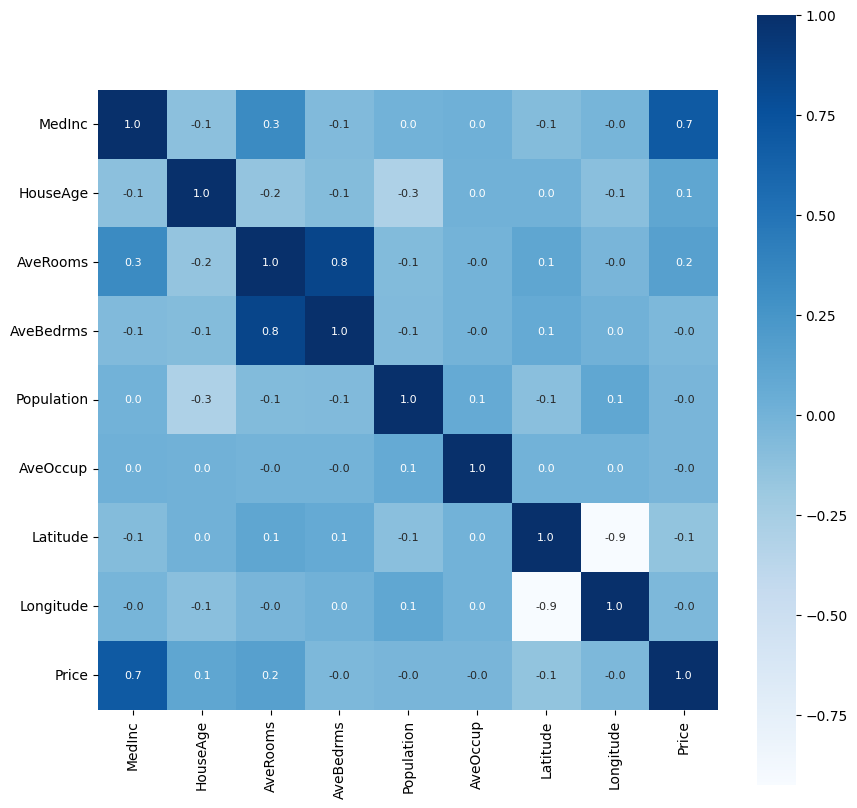

In [ ]:
# Creating a Heat Map to understand the correlation between the features.
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

<Axes: xlabel='HouseAge', ylabel='Price'>

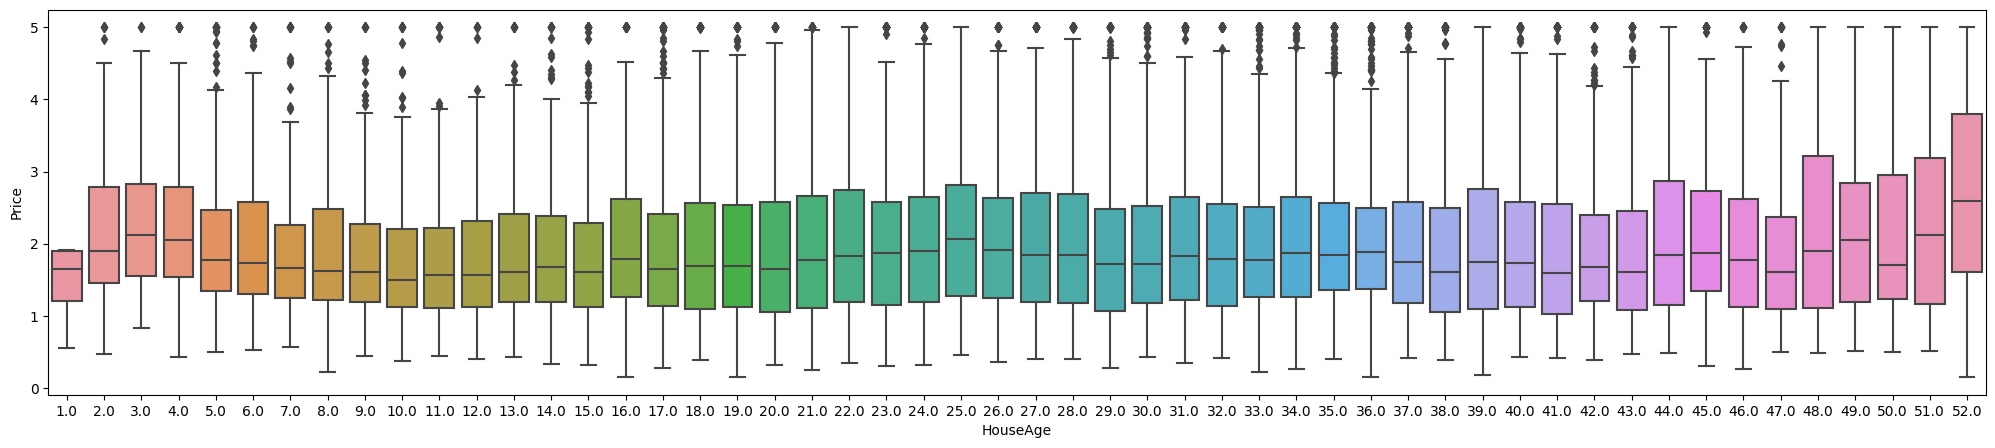

In [ ]:
# Using Box plot to display the Affect of House age on price
plt.figure(figsize=(25,5))
sns.boxplot(data=california_housing_dataframe, x='HouseAge', y='Price')

<Axes: xlabel='Price', ylabel='Count'>

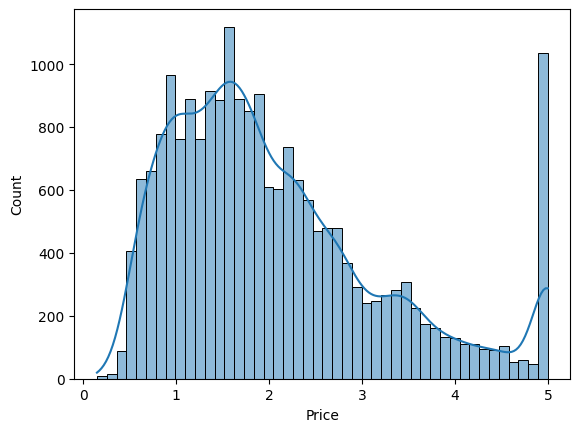

In [ ]:
sns.histplot(data=california_housing_dataframe, x = 'Price', kde=True)

**Separating the Target from the Dataset and storing it in another variable**  

In [ ]:
# Separating the target variable from the dataset

X = california_housing_dataframe.drop(['Price'], axis=1)
Y = california_housing_dataframe['Price']

In [ ]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

#**TRAIN-TEST-SPLIT**

In [ ]:
# Splitting the Dataset into Training Data and Testing Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


#**DATA STANDARDIZATION**

In [ ]:
# Data Standardization
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)
X = standardized_data
Y = california_housing_dataframe["Price"]
print(X)
print(Y)

[[ 2.34476576  0.98214266  0.62855945 ... -0.04959654  1.05254828
  -1.32783522]
 [ 2.33223796 -0.60701891  0.32704136 ... -0.09251223  1.04318455
  -1.32284391]
 [ 1.7826994   1.85618152  1.15562047 ... -0.02584253  1.03850269
  -1.33282653]
 ...
 [-1.14259331 -0.92485123 -0.09031802 ... -0.0717345   1.77823747
  -0.8237132 ]
 [-1.05458292 -0.84539315 -0.04021111 ... -0.09122515  1.77823747
  -0.87362627]
 [-0.78012947 -1.00430931 -0.07044252 ... -0.04368215  1.75014627
  -0.83369581]]
0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64


#**TRAINING THE MODEL**

#**XGBoost Regressor**

In [ ]:
# Loading the Model
model = XGBRegressor()

In [ ]:
# Training the Model with X_train i.e  training data
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

#**MODEL EVALUATION**

#**Prediction on Training Data**

In [ ]:
# Evaluation on Training Data
training_data_prediction = model.predict(X_train)
print(training_data_prediction)

[0.6893792  2.986824   0.48874274 ... 1.8632544  1.7800125  0.7565893 ]


In [ ]:
# R SQUARED ERROR
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# MEAN ABSOLUTE ERROR
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

# PRINTING THE "R SQUARED ERROR" AND "MEAN ABSOLUTE ERROR"
print("R Squared Error: ", score_1)
print("Mean Absolute Error: ", score_2)

R Squared Error:  0.9451221492760822
Mean Absolute Error:  0.1919170860794262


#**Prediction on Test Data**

In [ ]:
# Evaluation on Testing Data
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[2.787383  1.9628428 0.782536  ... 1.5060123 0.8763797 1.9317917]


In [ ]:
# R SQUARED ERROR
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# MEAN ABSOLUTE ERROR
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

# PRINTING THE "R SQUARED ERROR" AND "MEAN ABSOLUTE ERROR"
print("R Squared Error: ", score_1)
print("Mean Absolute Error: ", score_2)

R Squared Error:  0.8412904408180302
Mean Absolute Error:  0.30753655785801337


#**Visualizing Actual Prices and Predicted Prices**

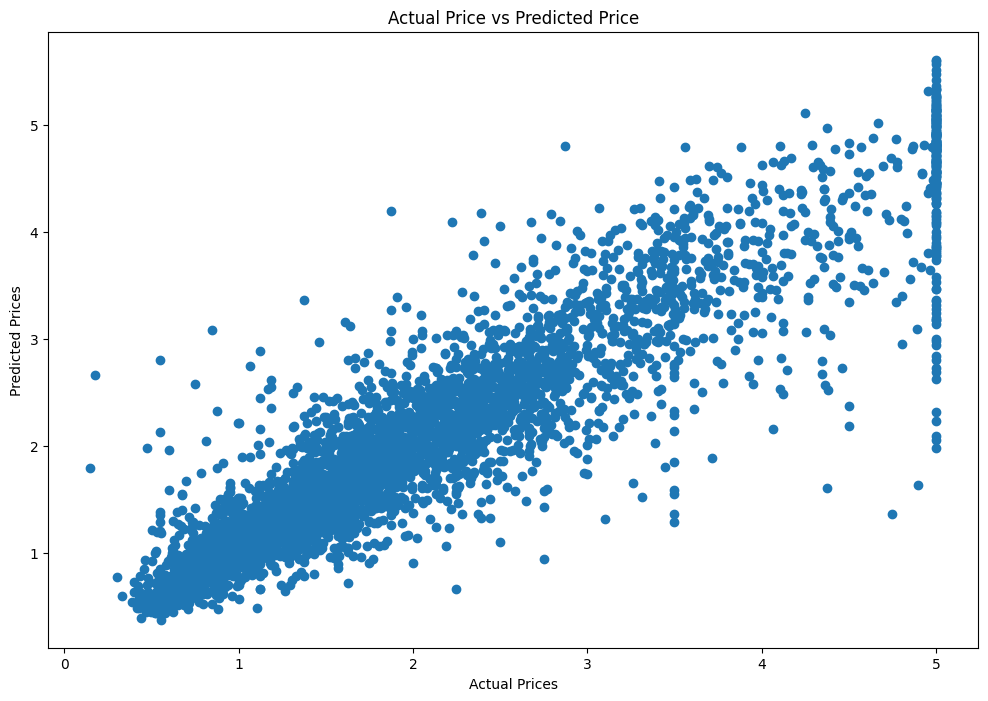

In [ ]:
# Setting the size of the plot
plt.figure(figsize=(12, 8))

# Using the scatter plot to display the relation between "Actual Price" and "Predicted Price"
plt.scatter(Y_test, test_data_prediction)

# Setting the Name for x-axis
plt.xlabel("Actual Prices")

# Setting the name for y-axis
plt.ylabel("Predicted Prices")

# Setting the Title for the graph
plt.title("Actual Price vs Predicted Price")

# Displaying the chart
plt.show()

**R-squared (R²):** R² is a statistical measure that represents the proportion of the variance in the dependent variable (target) that's explained by the independent variables (features). It ranges between 0 and 1, where higher values indicate better model fit to the data. An R² of 0.841 indicates that the model explains about 84.12% of the variance in the target variable.



**Mean Absolute Error (MAE):** MAE measures the average absolute difference between the predicted values and the actual values. It gives an idea of how far off your predictions are, on average, from the true values. A MAE of 0.30 indicates that, on average, the predictions are about 0.30 units away from the true values.



**In summary, an R² of 0.841 and an MAE of 0.308 are indicative of a model that is performing well and providing reasonably accurate predictions by our model**